In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.patches import Polygon

plt.rcParams['figure.figsize'] = (10,10)

In [2]:
simple = {'0_TAL': 'TAL',
 '10_ENDO': 'ENDO',
 '11_IC-A': 'IC',
 '12_POD': 'POD',
 '13_PCT-TAL': 'PCT-TAL',
 '14_IC_B': 'IC',
 '15_MES': "Other",
 '16_PEC': "PEC",
 '17_ENDO': "ENDO",
 '18_LOH': "Other",
 '19_ENDO': "ENDO",
 '1_PCT': "PCT",
 '20_PC': "PC",
 '21_PC': "PC",
 '22_MES': "Other",
 '23_LEU': "Other",
 '2_PCT': "PCT",
 '3_PCT': "PCT",
 '4_TAL': "TAL",
 '5_PC': "PC",
 '6_DCT': "DCT",
 '7_TAL': "TAL",
 '8_PC': "PC",
 '9_LOH': "Other"}

In [3]:
from PIL import Image

In [4]:
dapi_arr = np.array(Image.open('./dapi.png')).swapaxes(0,1)

In [5]:
topact = np.loadtxt('../topact-data/kidney-xenium/xenium-topact.txt')

In [6]:
hande = np.array(Image.open('hande.png')).swapaxes(0,1)

In [7]:
boundaries = {}

# this is the cell_boundaries.csv file as provided in Xenium output data set
with open('../topact-data/kidney-xenium/xenium_cell_boundaries.csv', 'r') as f: 
    lines = f.readlines()
    thecell = ''
    theboundary = []
    for line in lines:
        cell, x, y = line.rstrip().split(",")
        cell = cell[1:-1]
        if cell != thecell:
            if thecell:
                boundaries[thecell] = theboundary
                theboundary = []
            thecell = cell
            
        theboundary.append(((2*(float(x)), 2*(float(y)))))

In [8]:
supervised = pd.read_csv('../topact-data/kidney-xenium/xenium-supervised-labels.csv')

In [9]:
supervised['celltype'] = list(map(lambda x: simple[x], list(supervised.clusters)))

In [10]:
supct = {row.barcodes: row.celltype for row in supervised.itertuples()}

In [11]:
scalebar_width = 200
scalebar_height = 20

In [30]:
labs = ['Other', 'DCT', 'ENDO', 'IC', 'PC', 'PCT', 'PCT-TAL', 'PEC', 'POD', 'TAL']
# colmap = {'DCT': '#FF0000',  'PC': '#07BCB3', 'PCT': '#FFABC3', 'PCT-TAL': '#FFB396', 'TAL': '#FFB396'}
colmap = {'PC': '#07BCB3', 'PCT': '#A6CEE3', 'PCT-TAL': '#A6CEE3', 'TAL': '#1F78B4'}

cols = [colmap[ct] if ct in colmap else '#DDDDDD' for ct in labs]
cmap = LinearSegmentedColormap.from_list('mymap', cols, N=len(cols))
norm = plt.Normalize(vmin=0, vmax=len(labs)-1)

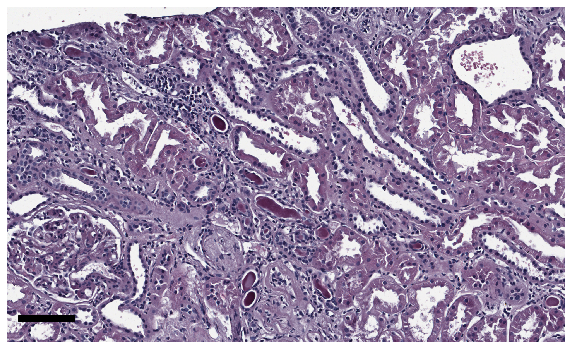

In [31]:
# 4a

plt.imshow(hande, interpolation='None')
ax = plt.gca()
ax.set_ylim([2100,3300])
ax.set_xlim([8700,6700])

scalebar = AnchoredSizeBar(ax.transData,
                           scalebar_width, '', 'lower left',
                           color='black',
                           size_vertical=scalebar_height,
                           frameon=False,
                           borderpad=1,
                           sep=0)
ax.add_artist(scalebar)
ax.axis('off')

# plt.savefig('./hande_tubule.png', dpi=300, bbox_inches='tight')
plt.show()

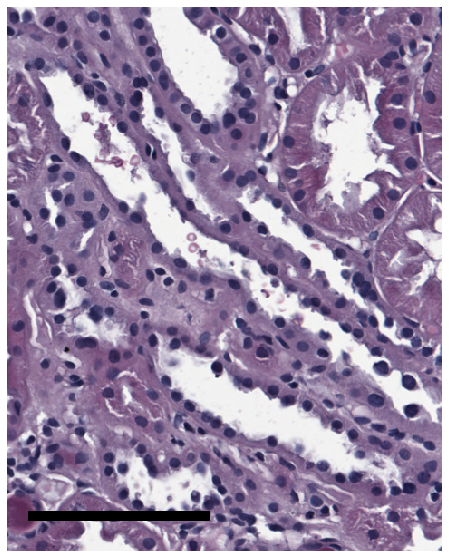

In [32]:
# 4a (zoomed)

plt.imshow(hande, interpolation='None')
ax = plt.gca()
ax.set_ylim([2450, 3050])
ax.set_xlim([7580,7100])

scalebar = AnchoredSizeBar(ax.transData,
                           scalebar_width, '', 'lower left',
                           color='black',
                           size_vertical=scalebar_height/2,
                           frameon=False,
                           borderpad=2,
                           sep=0)

ax.add_artist(scalebar)
ax.axis('off')

plt.show()
# plt.savefig('./hande_tubule_zoomed.png', dpi=600, bbox_inches='tight')

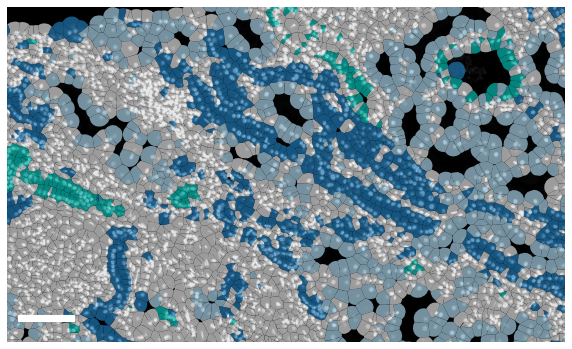

In [33]:
# 4b

plt.imshow(dapi_arr)
ax = plt.gca()

for boundary in boundaries:
    if boundary in supct:
        if supct[boundary] in colmap:
            color = colmap[supct[boundary]]
            alpha=0.7
        else:
            color = '#DDDDDD'
            alpha=0.7
            
        theboundary = [(y,x) for (x,y) in boundaries[boundary]]
        
        
            
        cell = Polygon(theboundary,color=color,alpha=alpha, linewidth=0)
        ax.add_patch(cell )
    
ax.set_ylim([2100,3300])
ax.set_xlim([8500,6500])

ax.axis('off')
scalebar = AnchoredSizeBar(ax.transData,
                           scalebar_width, '', 'lower left',
                           color='white',
                           size_vertical=scalebar_height,
                           frameon=False,
                           borderpad=1,
                           sep=0)
ax.add_artist(scalebar)

plt.show()

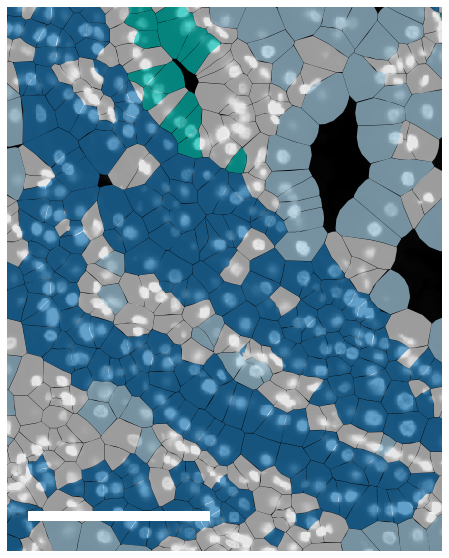

In [34]:
plt.imshow(dapi_arr, interpolation='None')
ax = plt.gca()

for boundary in boundaries:
    if boundary in supct:
        if supct[boundary] in colmap:
            color = colmap[supct[boundary]]
            alpha=0.7
        else:
            color = '#DDDDDD'
            alpha=0.7
            
        theboundary = [(y,x) for (x,y) in boundaries[boundary]]
        
        
            
        cell = Polygon(theboundary,color=color,alpha=alpha, linewidth=0)
        ax.add_patch(cell)
        

ax.set_ylim([2450, 3050])
ax.set_xlim([7420,6940])

scalebar = AnchoredSizeBar(ax.transData,
                           scalebar_width, '', 'lower left',
                           color='white',
                           size_vertical=scalebar_height/2,
                           frameon=False,
                           borderpad=2,
                           sep=0)
ax.add_artist(scalebar)
ax.axis('off')

plt.show()

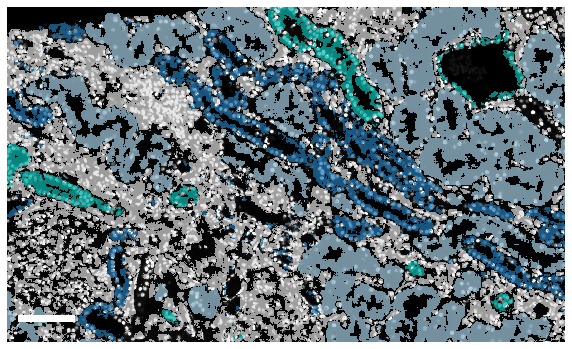

In [35]:
# 4c
plt.imshow(dapi_arr, interpolation='None')
ax = plt.gca()
ax.imshow(topact, interpolation='None', cmap=cmap, norm=norm, alpha=0.7, extent=(0, 7952*2, 1836*2, 0))
ax.set_ylim([2100,3300])
ax.set_xlim([8500,6500])
ax.axis('off')

scalebar = AnchoredSizeBar(ax.transData,
                           scalebar_width, '', 'lower left',
                           color='white',
                           size_vertical=scalebar_height,
                           frameon=False,
                           borderpad=1,
                           sep=0)
ax.add_artist(scalebar)    

plt.show()

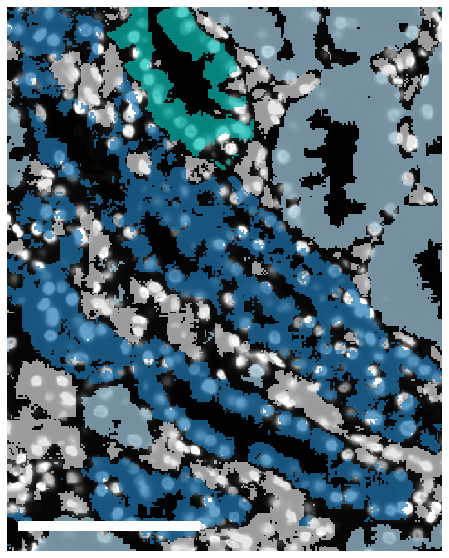

In [36]:
plt.imshow(dapi_arr, interpolation='None')
ax = plt.gca()
ax.imshow(topact, interpolation='None', cmap=cmap, norm=norm, alpha=0.7, extent=(0, 7952*2, 1836*2, 0))
ax.set_ylim([2450, 3050])
ax.set_xlim([7420,6940])

scalebar = AnchoredSizeBar(ax.transData,
                           scalebar_width, '', 'lower left',
                           color='white',
                           size_vertical=scalebar_height/2,
                           frameon=False,
                           borderpad=1,
                           sep=0)
ax.add_artist(scalebar)
ax.axis('off')

plt.show()

In [37]:
labs = ['0ther', 'DCT', 'ENDO', 'IC', 'PC', 'PCT', 'PCT-TAL', 'PEC', 'POD', 'TAL']
# colmap = {'DCT': '#FF0000',  'PC': '#07BCB3', 'PCT': '#FFABC3', 'PCT-TAL': '#FFB396', 'TAL': '#FFB396'}
colmap = { 'ENDO': '#33A02C', 'POD': '#A065BD'}# 'POD': '#EDCE02'}

cols = [colmap[ct] if ct in colmap else '#DDDDDD' for ct in labs]
cmap = LinearSegmentedColormap.from_list('mymap', cols, N=len(cols))
norm = plt.Normalize(vmin=0, vmax=len(labs)-1)

(4100.0, 2100.0, 2100.0, 3300.0)

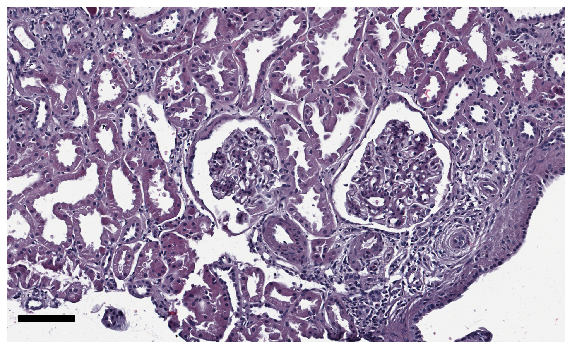

In [38]:
plt.imshow(hande, interpolation='None')
ax = plt.gca()
ax.set_ylim([2100, 3300])
ax.set_xlim([4100,2100])


scalebar = AnchoredSizeBar(ax.transData,
                           scalebar_width, '', 'lower left',
                           color='black',
                           size_vertical=scalebar_height,
                           frameon=False,
                           borderpad=1,
                           sep=0)
ax.add_artist(scalebar)

ax.axis('off')

(3530.0, 3050.0, 2350.0, 2950.0)

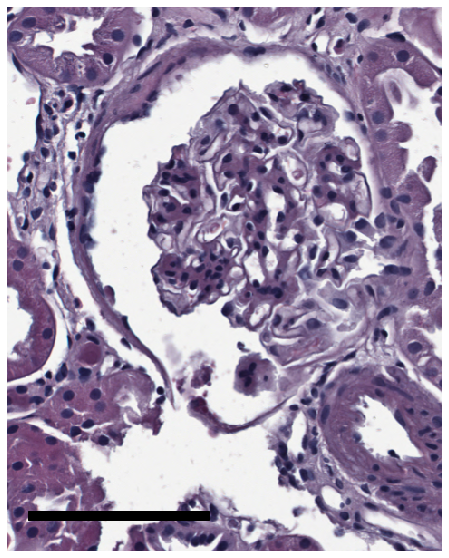

In [39]:
plt.imshow(hande, interpolation='None')
ax = plt.gca()
ax.set_ylim([2350, 2950])
ax.set_xlim([3530,3050])


scalebar = AnchoredSizeBar(ax.transData,
                           scalebar_width, '', 'lower left',
                           color='black',
                           size_vertical=scalebar_height/2,
                           frameon=False,
                           borderpad=2,
                           sep=0)
ax.add_artist(scalebar)

ax.axis('off')

(3900.0, 1900.0, 2100.0, 3300.0)

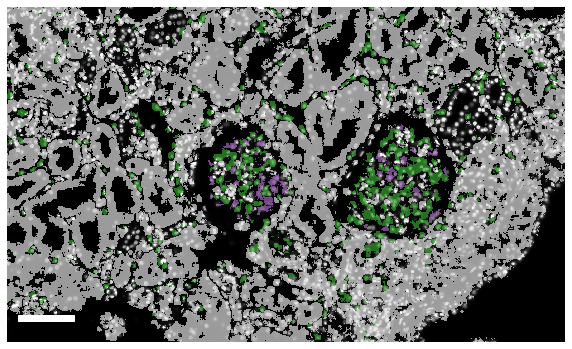

In [40]:


plt.imshow(dapi_arr, interpolation='None')
ax = plt.gca()
ax.imshow(topact, interpolation='None', cmap=cmap, norm=norm, alpha=0.7, extent=(0, 7952*2, 1836*2, 0))
ax.set_ylim([2100, 3300])
ax.set_xlim([3900,1900])

scalebar = AnchoredSizeBar(ax.transData,
                           scalebar_width, '', 'lower left',
                           color='white',
                           size_vertical=scalebar_height,
                           frameon=False,
                           borderpad=1,
                           sep=0)

ax.add_artist(scalebar)
ax.axis('off')

(3330.0, 2850.0, 2320.0, 2920.0)

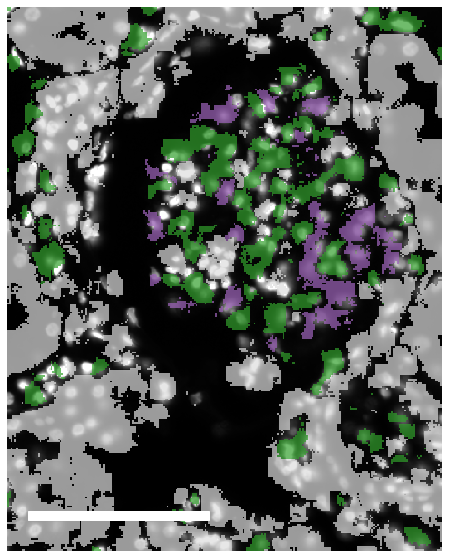

In [41]:


plt.imshow(dapi_arr, interpolation='None')
ax = plt.gca()
ax.imshow(topact, interpolation='None', cmap=cmap, norm=norm, alpha=0.7, extent=(0, 7952*2, 1836*2, 0))
ax.set_ylim([2320, 2920])
ax.set_xlim([3330,2850])

scalebar = AnchoredSizeBar(ax.transData,
                           scalebar_width, '', 'lower left',
                           color='white',
                           size_vertical=scalebar_height/2,
                           frameon=False,
                           borderpad=2,
                           sep=0)

ax.add_artist(scalebar)
ax.axis('off')

(3900.0, 1900.0, 2100.0, 3300.0)

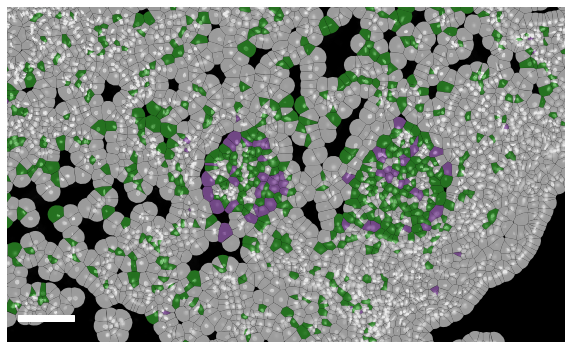

In [42]:
plt.imshow(dapi_arr, interpolation='None')
ax = plt.gca()

for boundary in boundaries:
    if boundary in supct:
        if supct[boundary] in colmap:
            color = colmap[supct[boundary]]
            alpha=0.7
        else:
            color = '#DDDDDD'
            alpha=0.7
            
        theboundary = [(y,x) for (x,y) in boundaries[boundary]]
        
        
            
        cell = Polygon(theboundary,color=color,alpha=alpha, linewidth=0)
        ax.add_patch(cell)

ax.set_ylim([2100, 3300])
ax.set_xlim([3900,1900])

scalebar = AnchoredSizeBar(ax.transData,
                           scalebar_width, '', 'lower left',
                           color='white',
                           size_vertical=scalebar_height,
                           frameon=False,
                           borderpad=1,
                           sep=0)

ax.add_artist(scalebar)
ax.axis('off')

(3330.0, 2850.0, 2320.0, 2920.0)

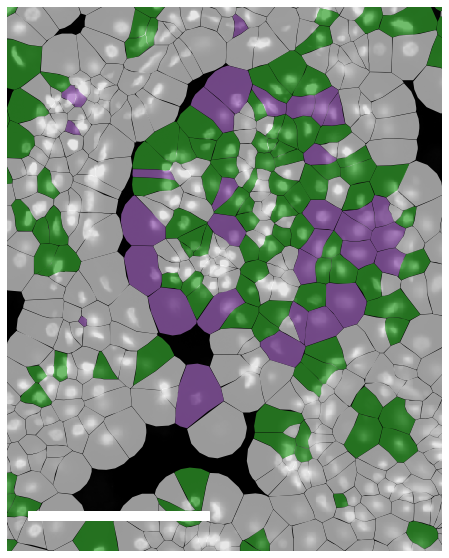

In [43]:
plt.imshow(dapi_arr, interpolation='None')
ax = plt.gca()

for boundary in boundaries:
    if boundary in supct:
        if supct[boundary] in colmap:
            color = colmap[supct[boundary]]
            alpha=0.7
        else:
            color = '#DDDDDD'
            alpha=0.7
            
        theboundary = [(y,x) for (x,y) in boundaries[boundary]]
        
        
            
        cell = Polygon(theboundary,color=color,alpha=alpha, linewidth=0)
        ax.add_patch(cell)

ax.set_ylim([2320, 2920])
ax.set_xlim([3330,2850])

scalebar = AnchoredSizeBar(ax.transData,
                           scalebar_width, '', 'lower left',
                           color='white',
                           size_vertical=scalebar_height/2,
                           frameon=False,
                           borderpad=2,
                           sep=0)

ax.add_artist(scalebar)
ax.axis('off')